In [ ]:
import numpy as np
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from skimage import morphology as skimorph
from skimage import filters as skifilters
from skimage import measure as skimeasure

(array([[1975.,   70.,    3., ...,    0.,    0.,    0.],
        [1941.,   99.,    8., ...,    0.,    0.,    0.],
        [1959.,   79.,    7., ...,    0.,    0.,    0.],
        ...,
        [1928.,  101.,   18., ...,    0.,    0.,    0.],
        [1940.,   89.,   17., ...,    0.,    0.,    0.],
        [1953.,   82.,   13., ...,    0.,    0.,    0.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 2048 BarContainer objects>)

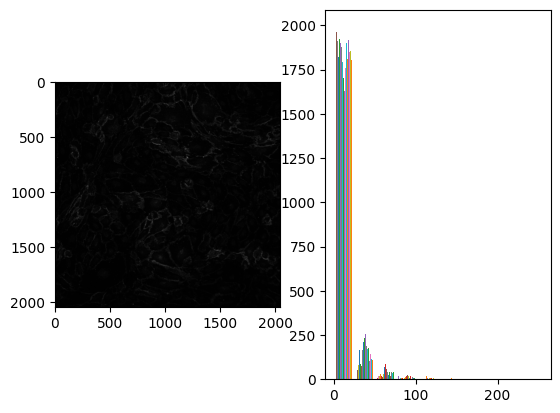

In [ ]:
lTestImg = Image.open('laceytestimg.tif')
lTestImgMat = np.asarray(lTestImg.convert('L'))
fig, ax = plt.subplots(1,2)
ax[0].imshow(lTestImg, cmap='gray')
ax[1].hist(lTestImgMat)

(array([[   0.,    0.,    0., ...,    3.,   70., 1975.],
        [   0.,    0.,    0., ...,    7.,  100., 1941.],
        [   0.,    0.,    0., ...,    7.,   79., 1959.],
        ...,
        [   0.,    0.,    0., ...,   14.,  105., 1928.],
        [   0.,    0.,    0., ...,   15.,   91., 1940.],
        [   0.,    0.,    0., ...,   12.,   83., 1953.]]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 2048 BarContainer objects>)

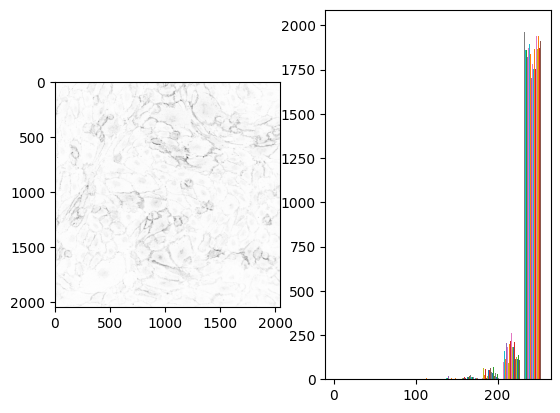

In [ ]:
lTestImgInverted = ImageOps.invert(lTestImg.convert('L'))
lTestImgInvMat = np.asarray(lTestImgInverted)
fig, ax = plt.subplots(1,2)
ax[0].imshow(lTestImgInvMat, cmap='gray')
ax[1].hist(lTestImgInvMat)

(array([[1269.,  470.,  119., ...,   13.,   21.,    3.],
        [1296.,  420.,  151., ...,   19.,   17.,    3.],
        [1268.,  412.,  150., ...,   15.,   17.,    9.],
        ...,
        [1300.,  377.,  120., ...,   24.,   18.,   19.],
        [1325.,  373.,  104., ...,   33.,    9.,    8.],
        [1296.,  388.,  118., ...,   25.,    8.,    7.]]),
 array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ]),
 <a list of 2048 BarContainer objects>)

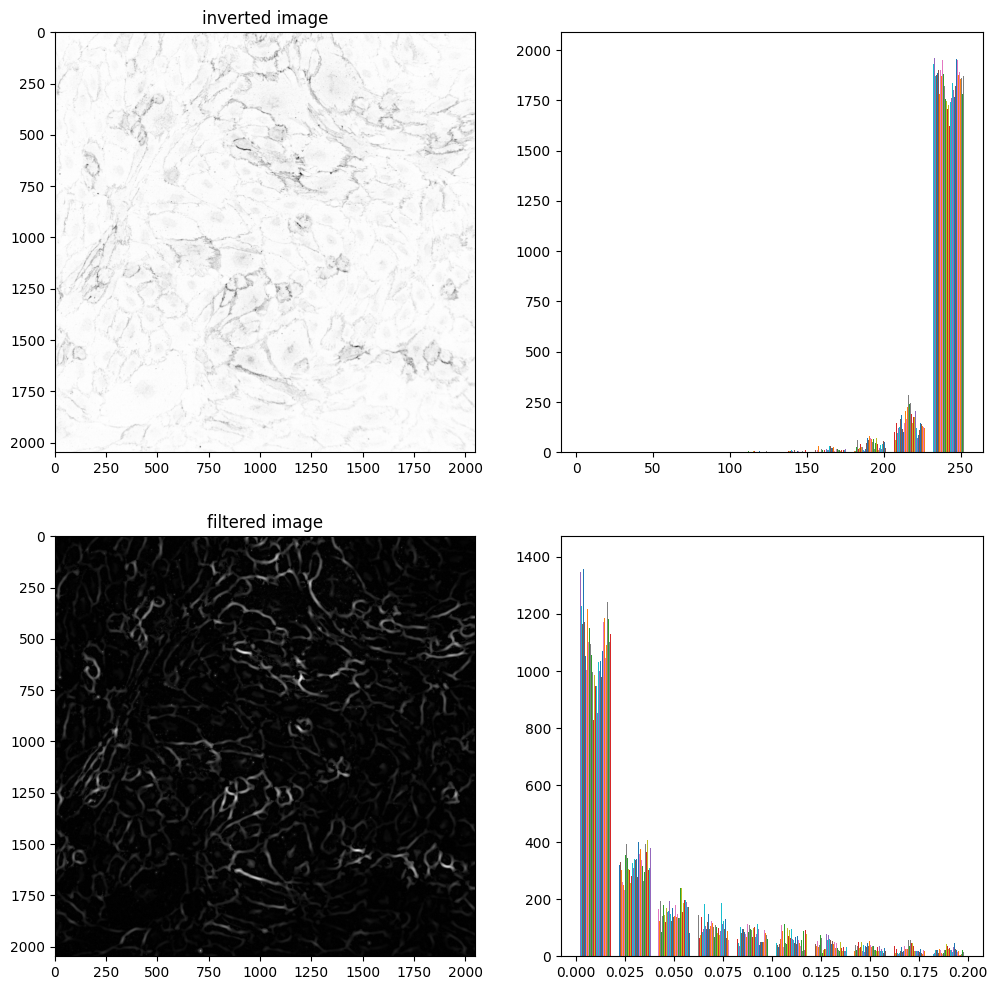

In [97]:
lMeijeringImg = skifilters.meijering(lTestImgInvMat, black_ridges=True, sigmas=range(1,10,1))

fig, ax = plt.subplots(2,2)
fig.set_figheight(12)
fig.set_figwidth(12)

ax[0,0].imshow(lTestImgInvMat, cmap='gray')
ax[0,0].set_title('inverted image')
ax[0,1].hist(lTestImgInvMat)
ax[1,0].imshow(lMeijeringImg, cmap='gray')
ax[1,0].set_title('filtered image')
ax[1,1].hist(lMeijeringImg, range=(0,0.2))

0.089353017837549


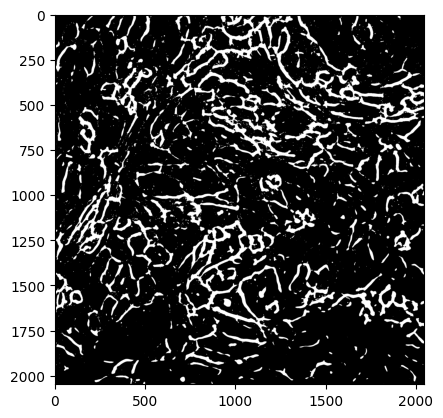

In [99]:
lThreshold = np.percentile(lMeijeringImg, 85) #only count the pixels above the 85th percentile of intensity, to avoid noise
print(lThreshold)
lVECadherinPixels = lMeijeringImg >= lThreshold #makes a boolean matrix of whether each pixel satisfies the condition

plt.imshow(lVECadherinPixels, cmap='gray')

In [106]:
#lVECadherinPixelsCount = len(np.where(lVECadherinPixels[0])[0])
lVECadherinPixelsCount = np.count_nonzero(lVECadherinPixels)
print(lVECadherinPixelsCount)

lImageHeight = lVECadherinPixels.shape[0]
lImageWidth = lVECadherinPixels.shape[1]

lRatioOfVECpx = lVECadherinPixelsCount / (lImageHeight*lImageWidth)

print(f'{lRatioOfVECpx*100:.3f}% of the {lImageHeight} x {lImageWidth} image is occupied by VE Cadherin')

629146
15.000% of the 2048 x 2048 image is occupied by VE Cadherin
